In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal, norm, expon, lognorm
from scipy.linalg import block_diag

from filterpy.kalman.sigma_points import MerweScaledSigmaPoints

from csnukf import ClosedSkewNormal

from scipy.optimize import minimize

# Initialization

In [2]:
%%time

# closed skew normal obsjects
csn_1 = ClosedSkewNormal(
    mu_z = np.array([[ 0.0]]),
    nu_z = np.array([[ 5.0]]),
    Sigma_z = np.array([[ 8.0]]),
    Gamma_z = np.array([[ 5.0]]),
    Delta_z = np.array([[ 3.0]])
)

csn_2 = ClosedSkewNormal(
    mu_z = np.array([[-1.8]]),
    nu_z = np.array([[0.5]]),
    Sigma_z = np.array([[ 1.5]]),
    Gamma_z = np.array([[-2.0]]),
    Delta_z = np.array([[1.0]])
)

csn_3 = ClosedSkewNormal(
    mu_z = np.array([[ 0.0]]),
    nu_z = np.array([[ 0.0]]),
    Sigma_z = np.array([[ 1.0]]),
    Gamma_z = np.array([[ -2.0]]),
    Delta_z = np.array([[ 3.0]])
)

n_samples = int(1e6)
csn1_samples = csn_1.rvs(n_samples)
csn2_samples = csn_2.rvs(n_samples)
csn3_samples = csn_3.rvs(n_samples)

C:\Developments_Personal\csnukf\csnukf\csn.py:352: RuntimeWarning: invalid value encountered in divide
  minus_f_div_g = lambda x : -(f(x)/g(x))


CPU times: total: 8min 45s
Wall time: 1min 7s


# Sum

In [3]:
csn_1add2 = csn_1 + csn_2
csn1add2_samples = csn1_samples + csn2_samples

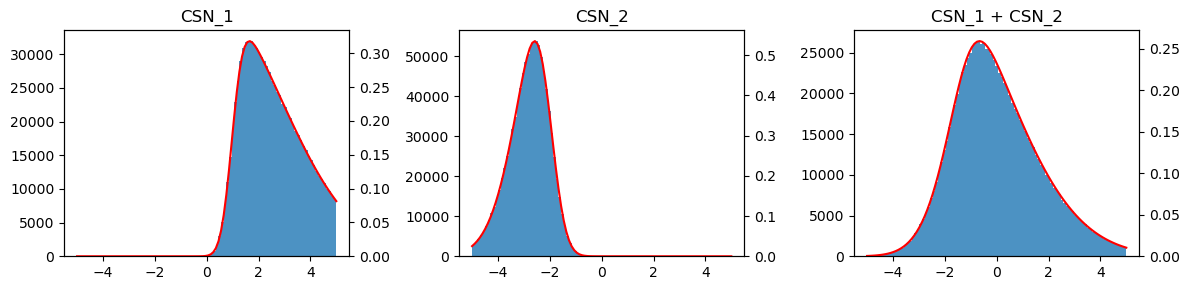

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

bins = np.linspace(-5, 5, 100)

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_1 + CSN_2")
ax.hist(csn1add2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1add2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

In [5]:
csn_1add2add3 = csn_1 + csn_2 + csn_3
csn1add2add3_samples = csn1_samples  + csn2_samples + csn3_samples

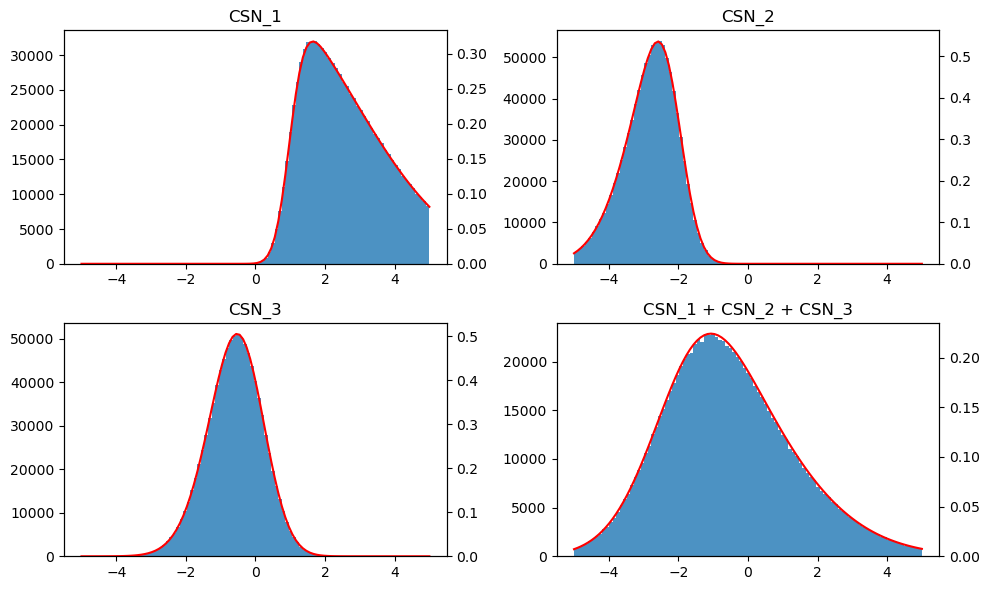

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

bins = np.linspace(-5, 5, 100)

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_3")
ax.hist(csn3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[3]
ax.set_title("CSN_1 + CSN_2 + CSN_3")
ax.hist(csn1add2add3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1add2add3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

# Subtraction

In [7]:
csn_1minus2 = csn_1 - csn_2
csn1minus2_samples = csn1_samples - csn2_samples

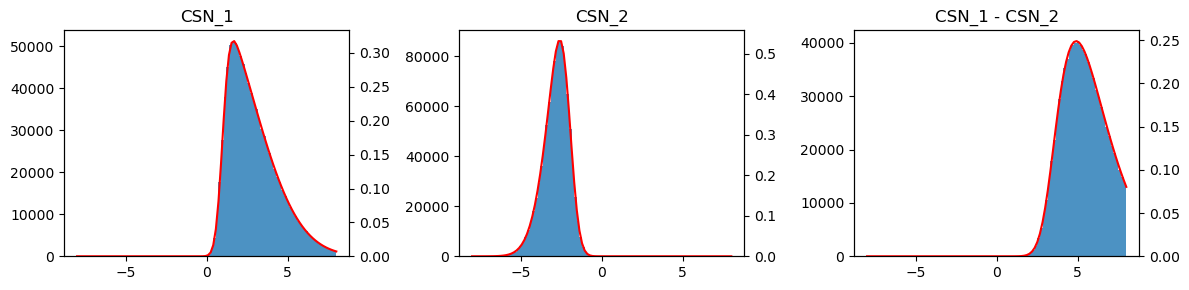

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

bins = np.linspace(-8, 8, 100)

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_1 - CSN_2")
ax.hist(csn1minus2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1minus2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

In [9]:
csn_1minus2add3 = csn_1 - csn_2 + csn_3
csn1minus2add3_samples = csn1_samples  - csn2_samples + csn3_samples

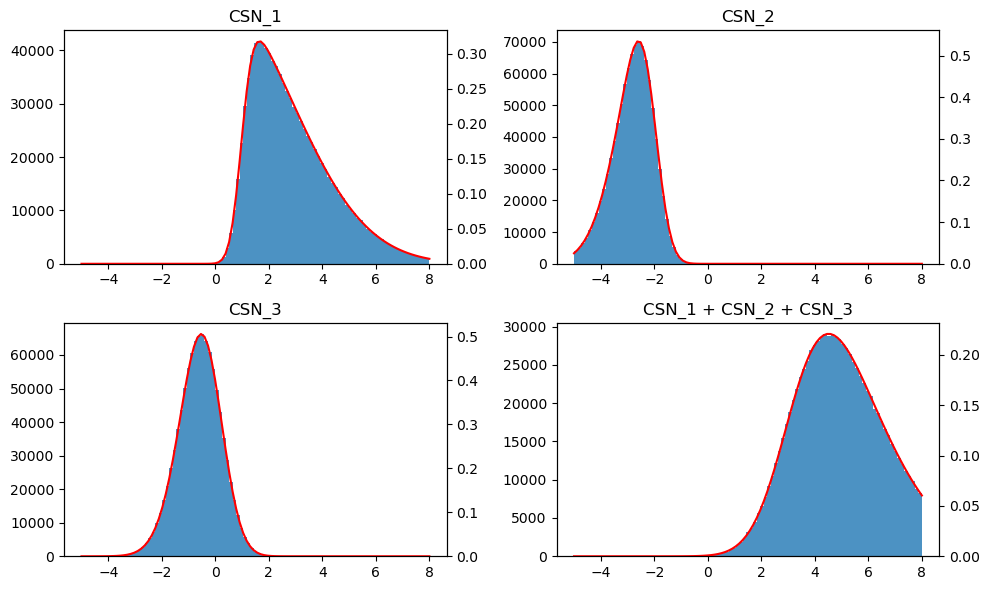

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

bins = np.linspace(-5, 8, 100)

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_1")
ax.hist(csn1_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2")
ax.hist(csn2_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_2.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_3")
ax.hist(csn3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[3]
ax.set_title("CSN_1 + CSN_2 + CSN_3")
ax.hist(csn1minus2add3_samples, bins, label="Samples", alpha=.8)
axf = ax.twinx()
axf.plot(bins, csn_1minus2add3.pdf_z(bins), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()

# With constants

In [11]:
csn_2pluspi = csn_2 + np.pi
csn_2minuspi = csn_2 - np.pi
csn_2timespi = csn_2 * np.pi
csn_2divpi = csn_2 / np.pi

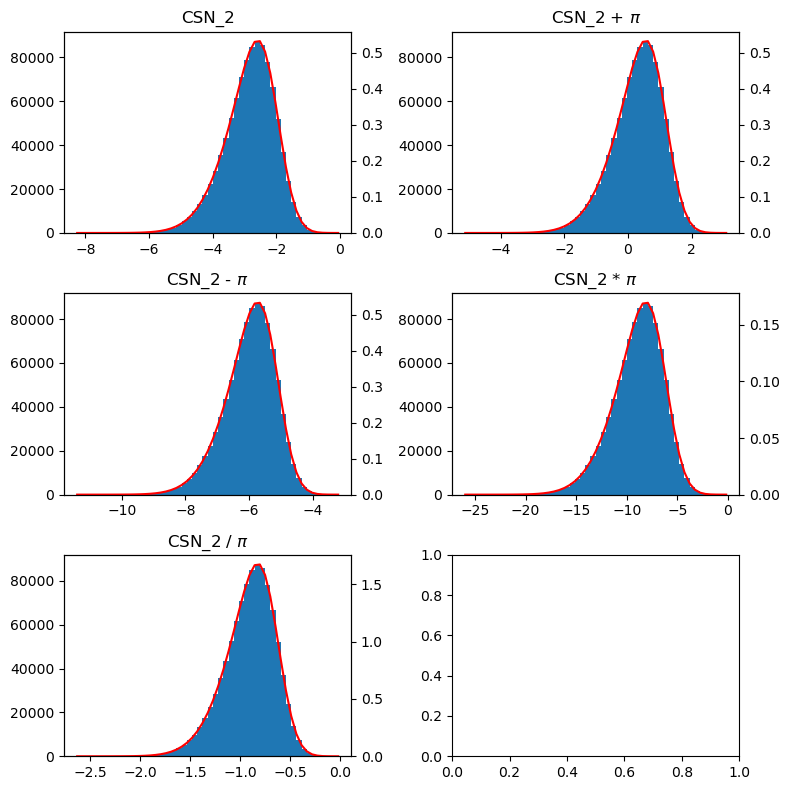

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8,8))

axes = axes.flatten()

ax = axes[0]
ax.set_title("CSN_2")
x = ax.hist(csn2_samples, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[1]
ax.set_title("CSN_2 + $\pi$")
x = ax.hist(csn2_samples + np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2pluspi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[2]
ax.set_title("CSN_2 - $\pi$")
x = ax.hist(csn2_samples - np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2minuspi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[3]
ax.set_title("CSN_2 * $\pi$")
x = ax.hist(csn2_samples*np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2timespi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

ax = axes[4]
ax.set_title("CSN_2 / $\pi$")
x = ax.hist(csn2_samples/np.pi, bins=50)[1]
axf = ax.twinx()
axf.plot(x, csn_2divpi.pdf_z(x), color="r", label="Continuous")
axf.set_ylim(0)

fig.tight_layout()